# Introduction to Neural Networks: Bank Churn prediction

# Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary:

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
# Library to split data
from sklearn.model_selection import train_test_split
# Library to encode the variables
from sklearn import preprocessing
# To plot confusion matrix
from sklearn.metrics import confusion_matrix
# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# library to import to standardize the data
from sklearn.preprocessing import StandardScaler
#To import different metrics
from sklearn import metrics
from tensorflow.keras import backend
# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")
# importing different functions to build models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from scikeras.wrappers import KerasClassifier, KerasRegressor
import tensorflow as tf
# importing GridSearch CV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# importing roc_curve to plot
from sklearn.metrics import roc_curve
from matplotlib import pyplot
# importing SMOTE
from imblearn.over_sampling import SMOTE
# importing metrics
from sklearn import metrics
import random
#Importing classback API
from keras import callbacks

# Loading the dataset

In [2]:
data=pd.read_csv('/content/Churn.csv')

In [3]:
df=data.copy()

## Data Overview

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.shape

(10000, 14)

In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [10]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [11]:
df['Exited'].value_counts(1)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

##### **Observations**


* There are 10,000 rows and 14 columns in the dataset
* There are no missing values
* `RowNumber`, `CustomerId`, and `Surname` have been drop as they don't add any value to the model
* The average `Tenure` of the customers is about 5 years
*  About 80% of customers stay loyal to the bank and about 20% of the customers have exited.


## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of the credit score of customers? Are there any noticeable patterns or outliers in the distribution?
2. How many active members are there with the bank?
3. How are the different customer attributes correlated to each other?
4. Who is churning more when compared to males and females?  
5. Customers from which geographical part are churning more?

## Univariate Analysis

In [12]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [13]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Credit Score

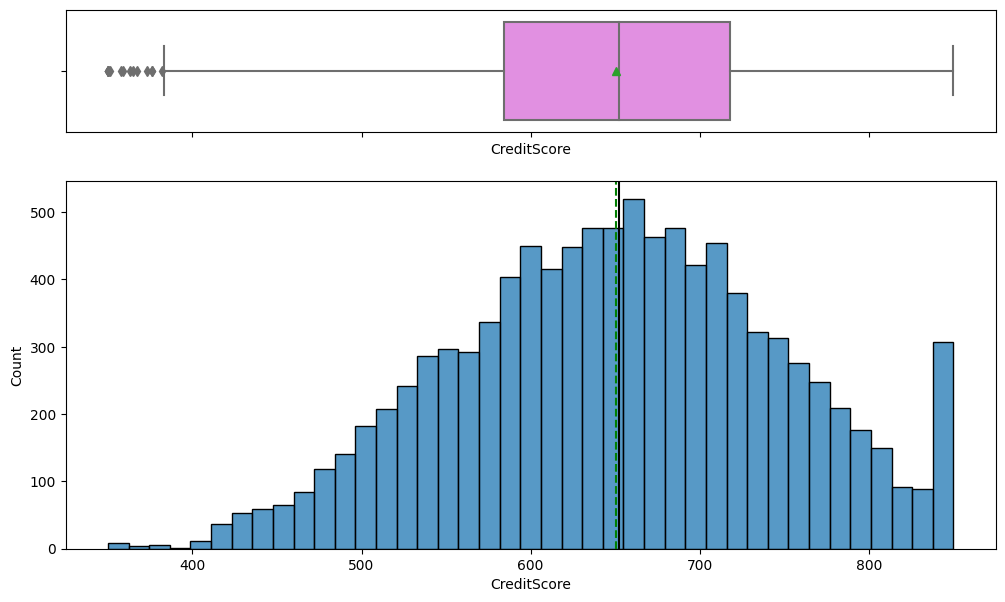

In [14]:
histogram_boxplot(df,'CreditScore')

* Credit Score has a slightly left skewed distribution with the average being 650

### Geography

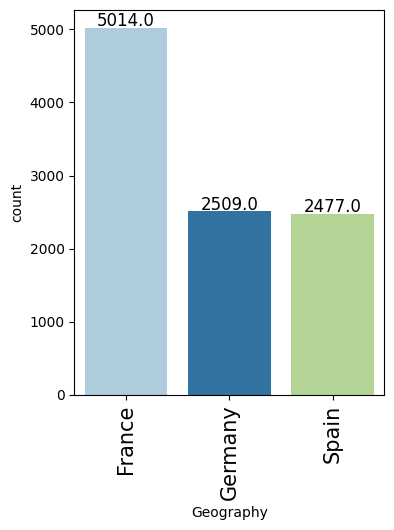

In [15]:
labeled_barplot(df,'Geography')

* The majority of customers are located in France

### Gender

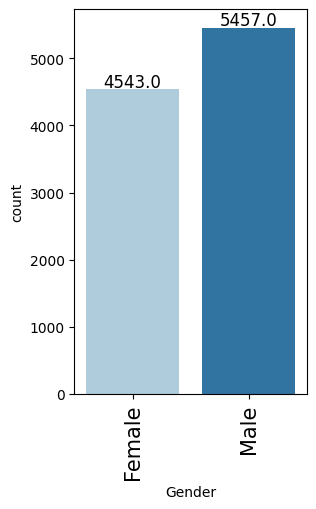

In [16]:
labeled_barplot(df,'Gender')

* Males make up a larger population of the customer demographics although their difference is marginal

### Age

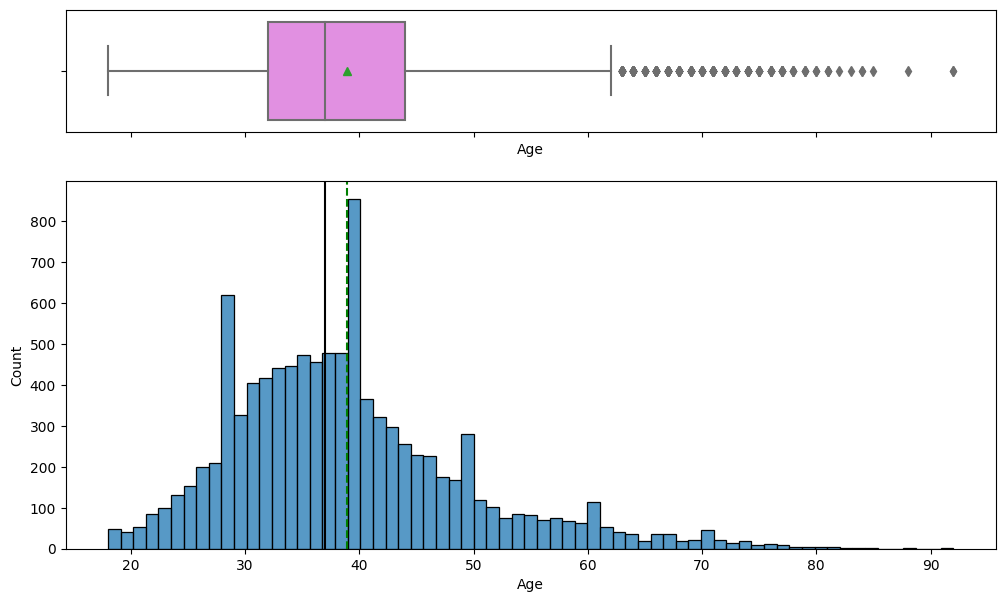

In [17]:
histogram_boxplot(df,'Age')

* The age distribution is slighly right skewed with the average age being around 38 years old. There are a few upper outliers within the dataset

### Tenure

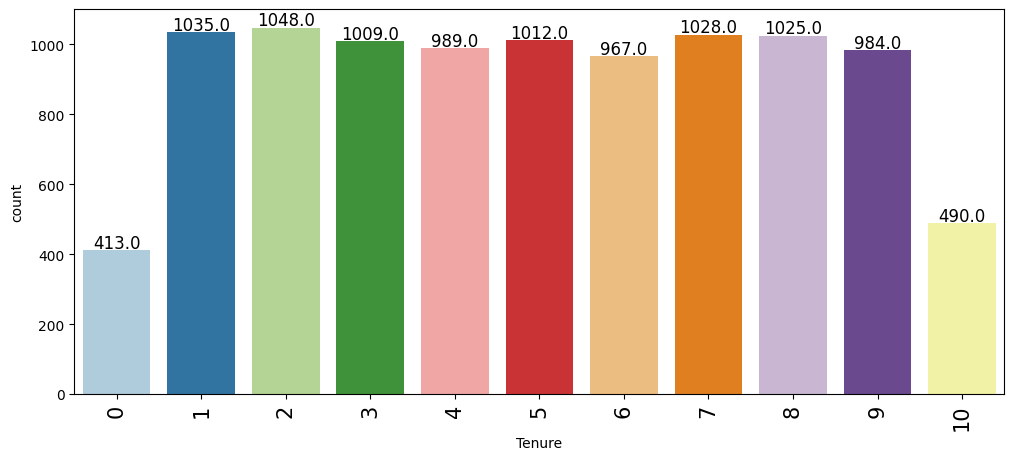

In [18]:
labeled_barplot(df,'Tenure')

* The majority of the customer base has a tenure between 1-9 years with the majority being 2 years

### Number of Products

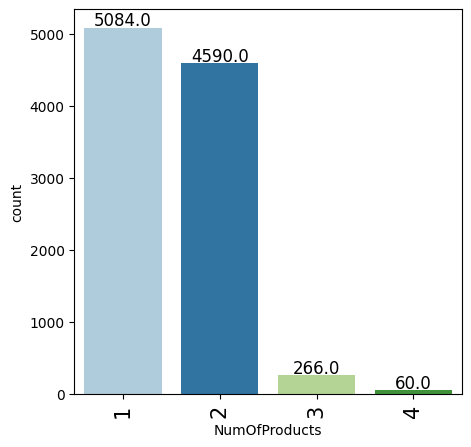

In [19]:
labeled_barplot(df,'NumOfProducts')

* Most customers have at least 1 product that they have purchased through the bank

### Account Balance

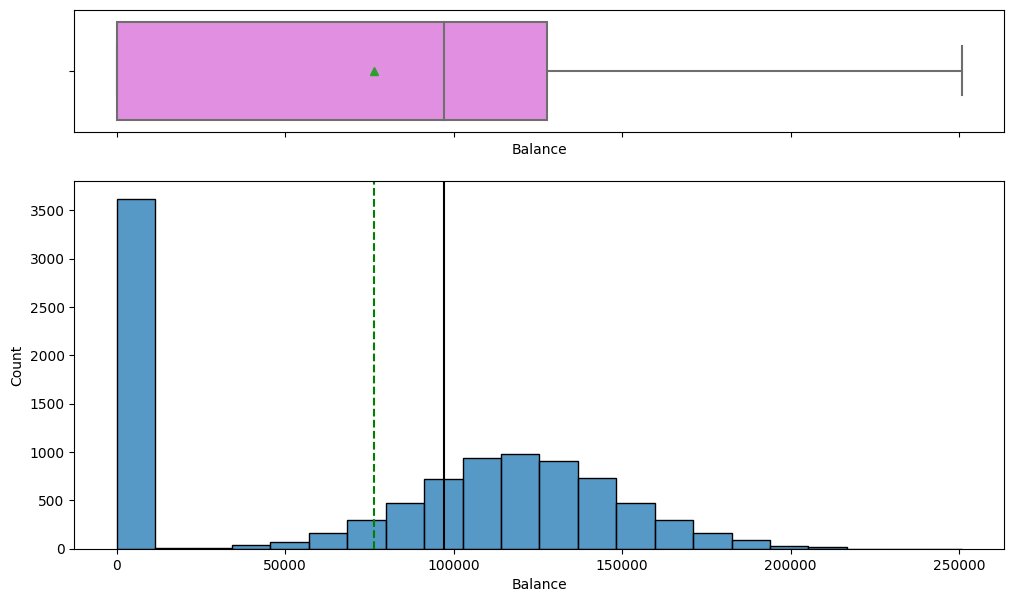

In [20]:
histogram_boxplot(df,'Balance')

* Account Balance is heavily right skewed with the average account balance around 75,000

### Has Credit Card

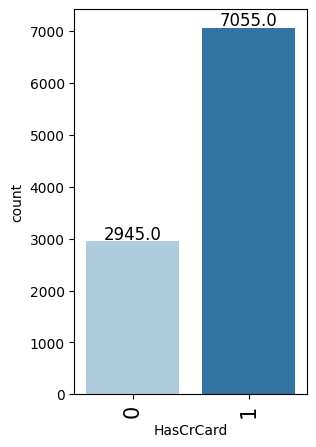

In [21]:
labeled_barplot(df,'HasCrCard')

* More than 50% of the customers has a credit card

### Estimated Salary

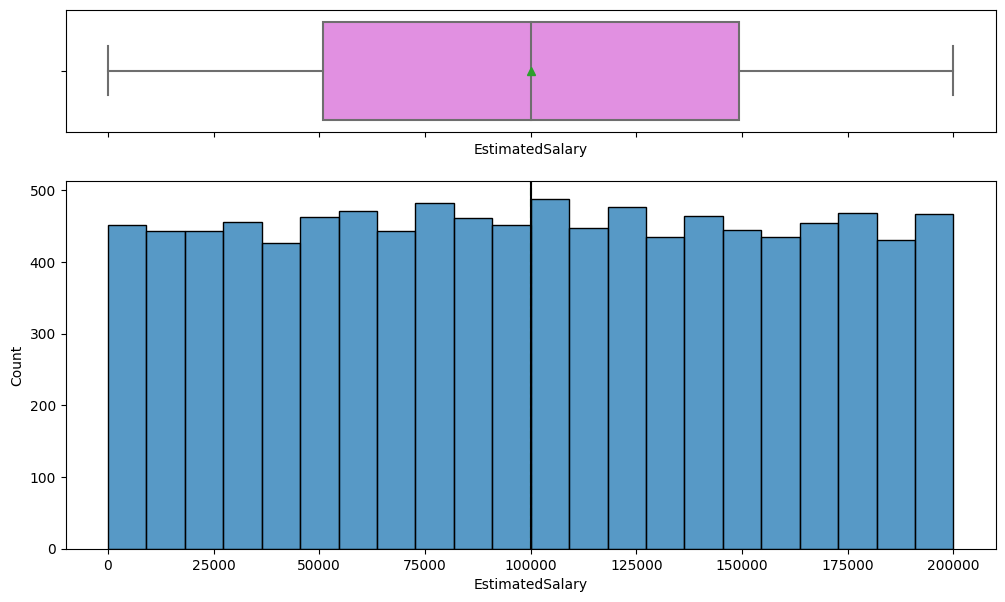

In [22]:
histogram_boxplot(df,'EstimatedSalary')

* The average salary of the customer base has a normal distribution with the mean at 100,000

### Active Member

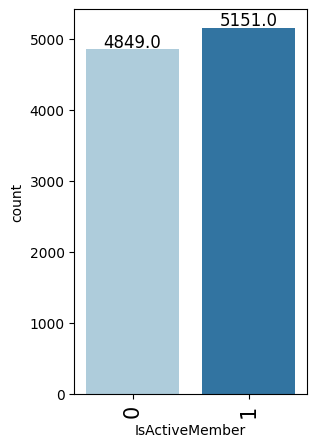

In [23]:
labeled_barplot(df,'IsActiveMember')

* Over 50% of the customer base is an active member

### Exited

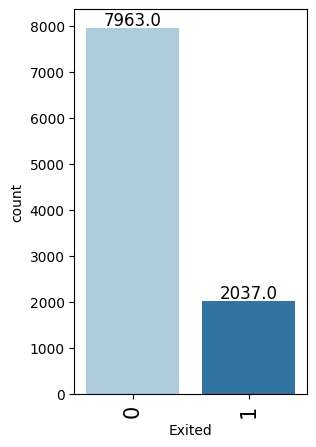

In [24]:
labeled_barplot(df,'Exited')

* Most customers have stayed loyal to the bank and have not exited

## Bivariate Analysis

In [25]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [26]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Correlation

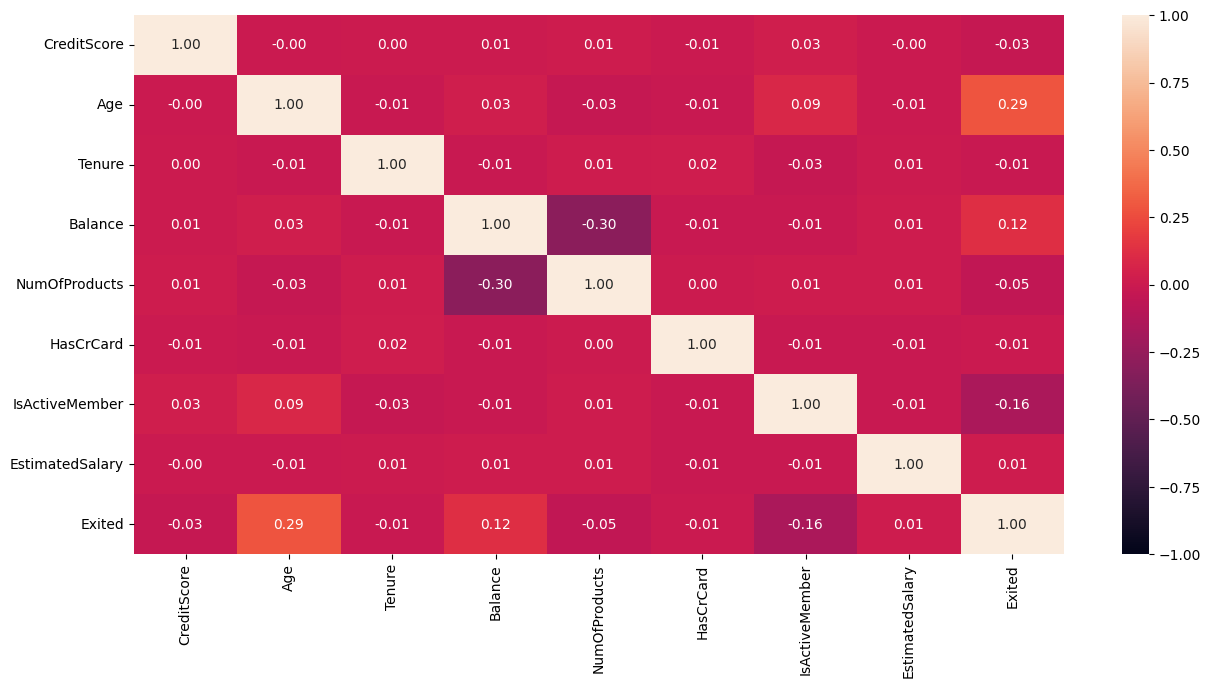

In [27]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f")
plt.show()

* `Age` and `Exited` have the strongest correlation, however it's important to note that there isn't much correlation amongst the dataset overall.

### Exited v. Credit Score

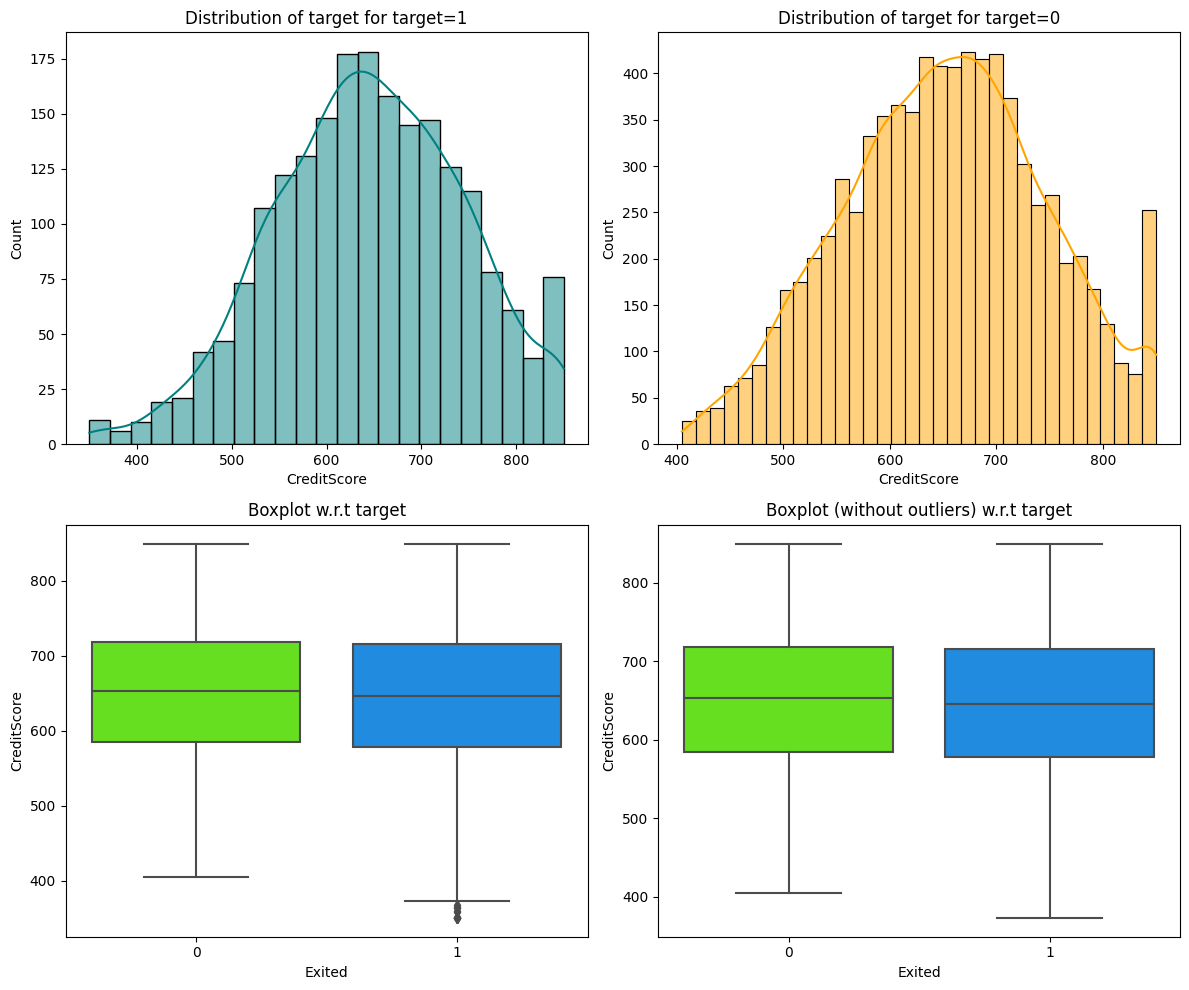

In [28]:
distribution_plot_wrt_target(df,'CreditScore','Exited')

* We observe that customers that have and have not exited have similar credit score distributions

### Exited v. Geography

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


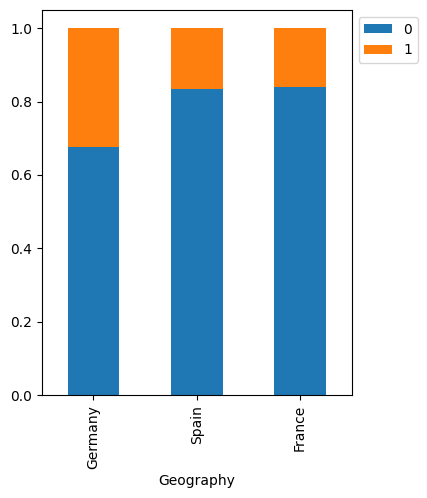

In [29]:
stacked_barplot(df, 'Geography','Exited')

Most of the customers that have exited were from `Germany`

### Exited v. Gender

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


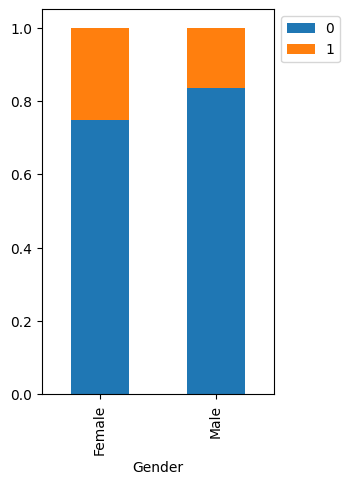

In [30]:
stacked_barplot(df, 'Gender','Exited')

* A female customer is likelier to exit the bank than the male demographic of customers

### Exited v. Age

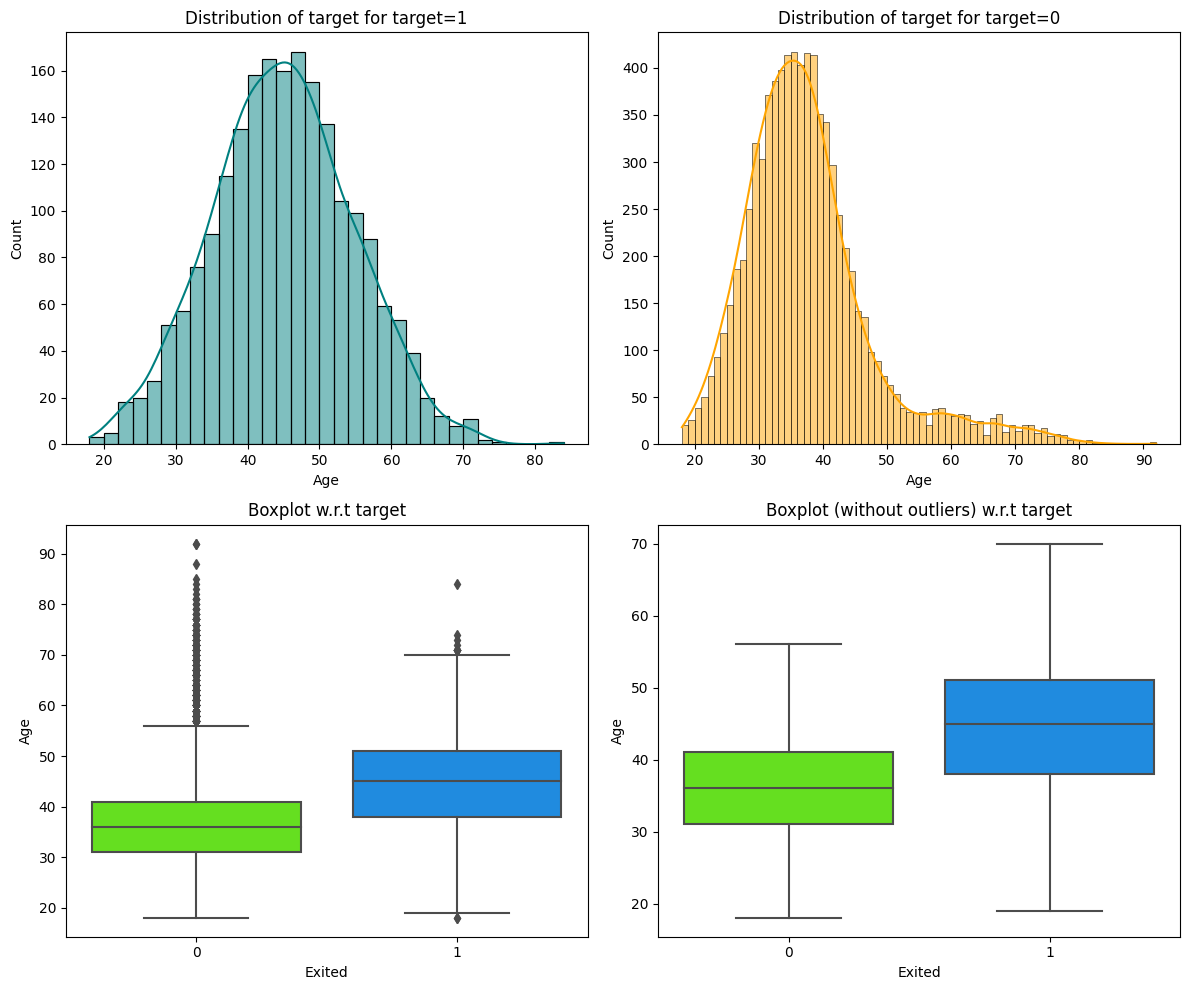

In [31]:
distribution_plot_wrt_target(df, 'Age','Exited')

* We can observe that on average, the older demographic exits

### Exited v. Tenure

Exited     0     1    All
Tenure                   
All     7963  2037  10000
1        803   232   1035
3        796   213   1009
9        771   213    984
5        803   209   1012
4        786   203    989
2        847   201   1048
8        828   197   1025
6        771   196    967
7        851   177   1028
10       389   101    490
0        318    95    413
------------------------------------------------------------------------------------------------------------------------


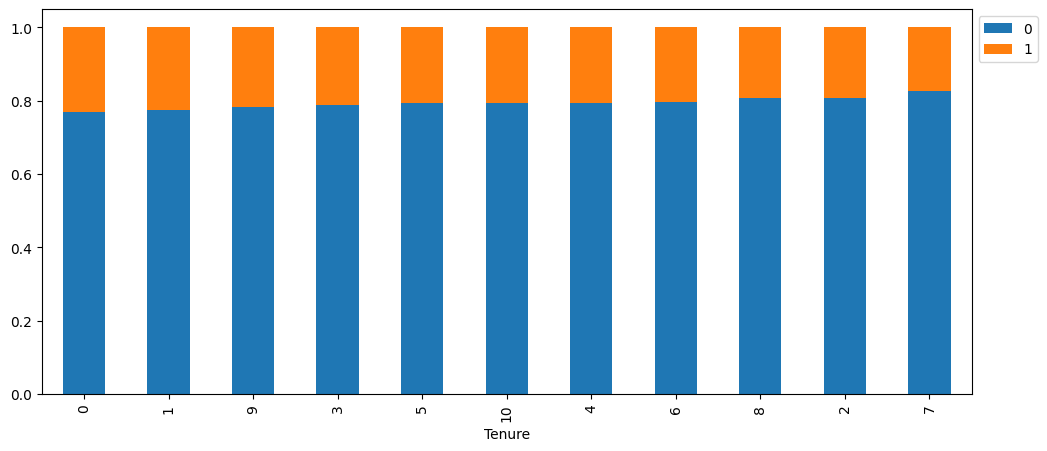

In [32]:
stacked_barplot(df, 'Tenure','Exited')

* The likelhood of a customer exiting does not depend on their tenure

### Exited v. Number of Products

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


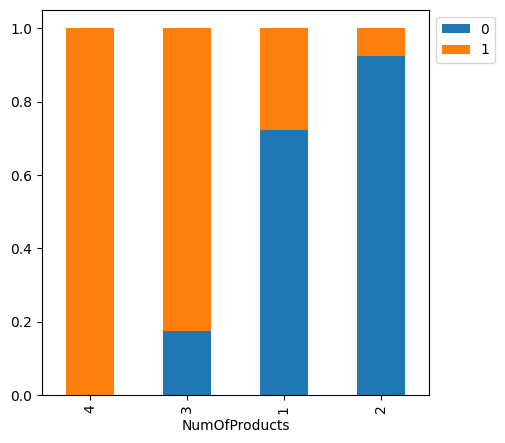

In [33]:
stacked_barplot(df, 'NumOfProducts','Exited')

* 100% of customers that have 4 products and 80% of customers that have 3 products exited.

### Exited v. Balance

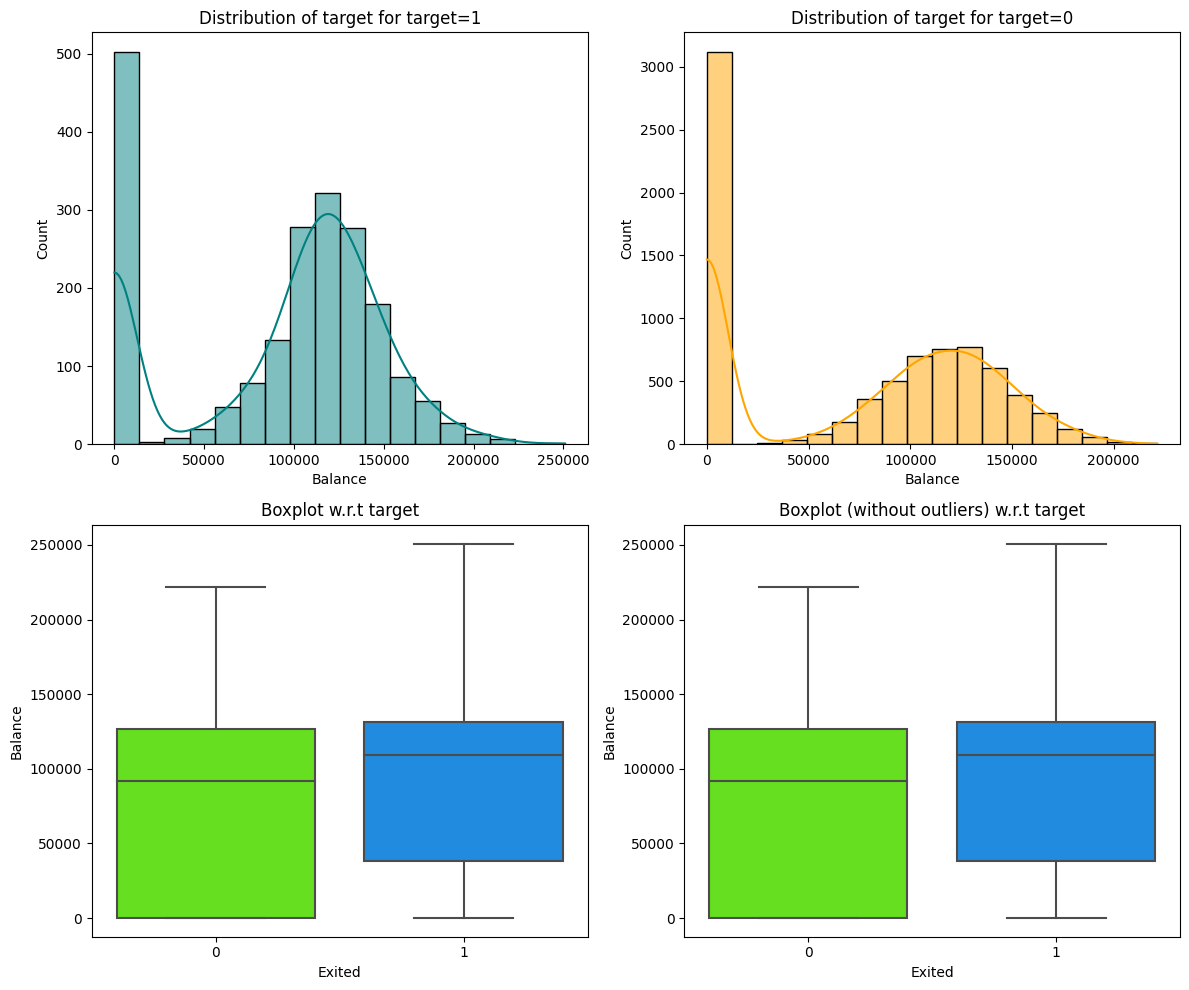

In [34]:
distribution_plot_wrt_target(df, 'Balance','Exited')

* The likelhood of a customer exiting does not depend on their account balance

### Exited v. Has Credit Card

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


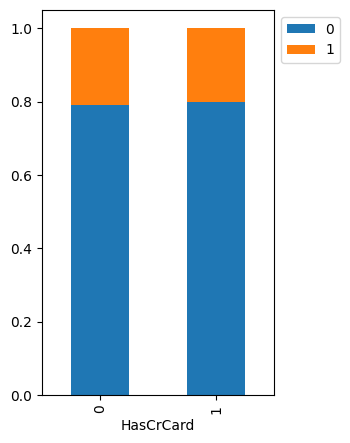

In [35]:
stacked_barplot(df,'HasCrCard','Exited')

* The likelhood of a customer exiting does not depend whether or not they have a credit card

### Exited v. Estimated Salary

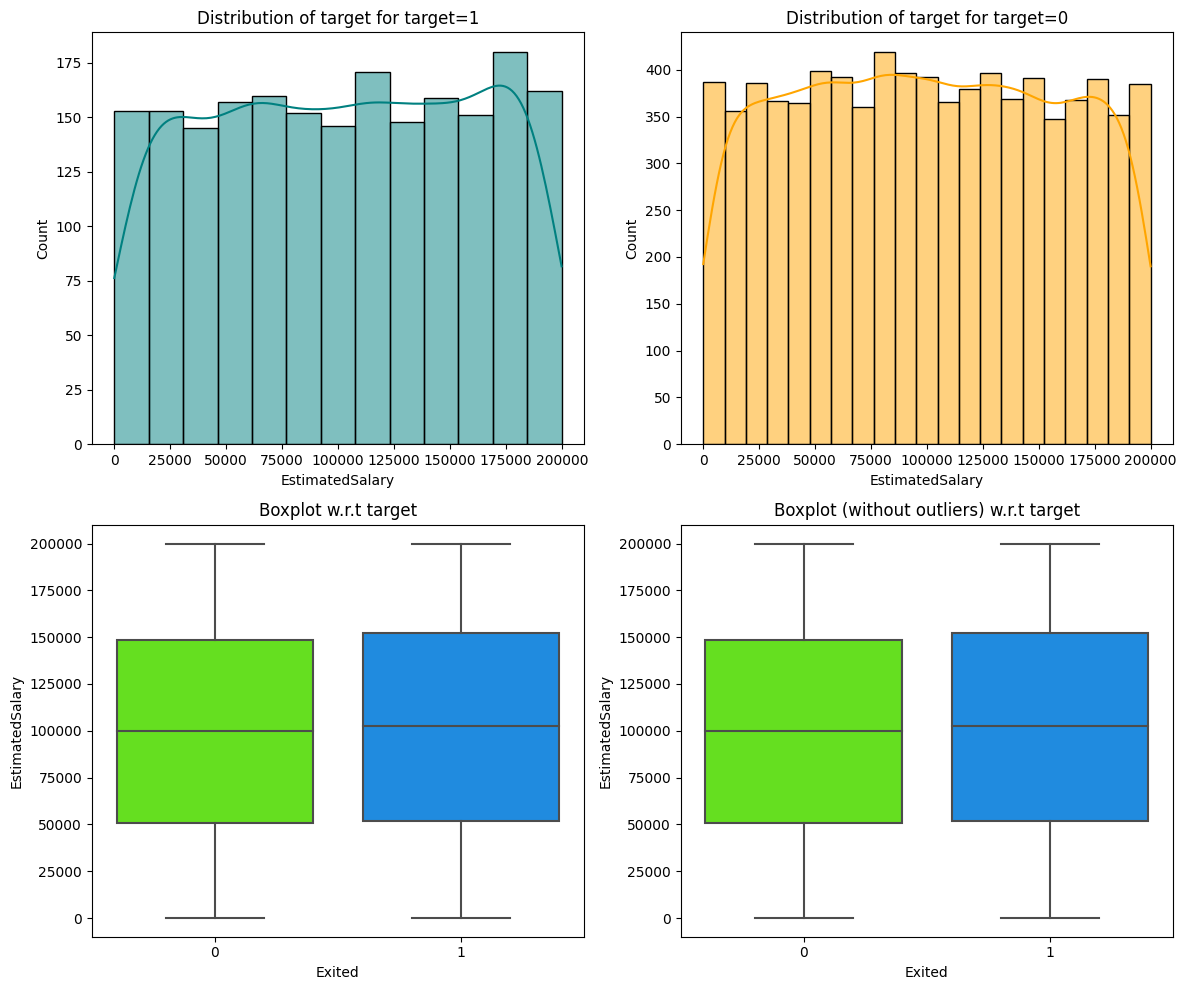

In [36]:
distribution_plot_wrt_target(df, 'EstimatedSalary','Exited')

* Customers that have and have not exited have a normal distribution of estimated salary, therefore it's likely not a determining factor as to why they exit

### Exited v. Active Member

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


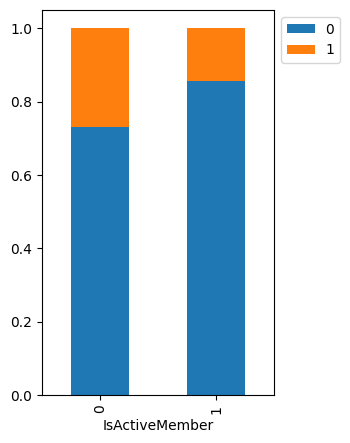

In [37]:
stacked_barplot(df, 'IsActiveMember','Exited')

* Customers that are not as active are likely to exit

# Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [38]:
X=df.drop(['Exited'],axis=1)
y=df[['Exited']]

In [39]:
#Splitting dataset into Training and Testing
X_large, X_test, y_large, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42,stratify=y,shuffle = True)

In [40]:
#Splitting dataset into Training and Validation
X_train, X_val, y_train, y_val = train_test_split(X_large,y_large, test_size = 0.2, random_state = 42,stratify=y_large, shuffle = True)

In [41]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(6400, 10)
(6400, 1)
(1600, 10)
(1600, 1)
(2000, 10)
(2000, 1)


In [42]:
#onehot encoding
X_train=pd.get_dummies(X_train, columns=['Geography','Gender'],drop_first=True)
X_val=pd.get_dummies(X_val, columns=['Geography','Gender'],drop_first=True)
X_test=pd.get_dummies(X_test, columns=['Geography','Gender'],drop_first=True)

In [43]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
3006,747,45,1,114959.12,1,1,0,189362.39,0,0,0
5735,585,44,4,0.00,2,0,1,101728.46,0,1,0
5652,691,29,9,0.00,2,0,0,199635.93,0,0,0
26,756,36,2,136815.64,1,1,1,170041.95,1,0,1
3596,643,36,0,148159.71,1,0,0,55835.66,0,0,1


In [44]:
#scaling the data
sc=StandardScaler()
temp = sc.fit(X_train[['CreditScore','Age','Tenure','Balance','EstimatedSalary']])
X_train[['CreditScore','Age','Tenure','Balance','EstimatedSalary']] = temp.transform(X_train[['CreditScore','Age','Tenure','Balance','EstimatedSalary']])
X_val[['CreditScore','Age','Tenure','Balance','EstimatedSalary']] = temp.transform(X_val[['CreditScore','Age','Tenure','Balance','EstimatedSalary']])
X_test[['CreditScore','Age','Tenure','Balance','EstimatedSalary']] = temp.transform(X_test[['CreditScore','Age','Tenure','Balance','EstimatedSalary']])

# Model Building

## Model Evaluation Criterion

**Predictions that the model can falsely categorize:**
* Predicting a customer is exiting and the customer is not actually going to be exiting.
* Predicting a customer is not exiting and the customer is in fact exiting

**The more important case:**
* The banks will have greater loss by the model predicting a customer is not exiting when they are in fact going to be.

**Plan on reducing the loss (False Negative)**
* We will be focusing on the Recall to be maximized as the higher the recall, the likelier the false negative is minimized so that the bank can retain their customers.

In [45]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

## Model 1

In [46]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [47]:
# Initializing the model
model = Sequential()
#input layer
model.add(Dense(128,activation='relu', input_dim=11))
#1st hidden layer
model.add(Dense(64, activation='relu'))
#2nd hidden layer
model.add(Dense(32, activation='relu'))
#output layer
model.add(Dense(1, activation='sigmoid'))

In [48]:
#Using the Stochastic Gradient optimizer with the binary cross entropy loss function
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11905 (46.50 KB)
Trainable params: 11905 (46.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
#fit the model on training data for 100 epochs
history=model.fit(X_train, y_train,
                  validation_data=(X_val,y_val),
                  epochs=100)

Epoch 1/100
200/200 [==============================] - 1s 4ms/step - loss: 0.5573 - accuracy: 0.7472 - val_loss: 0.4815 - val_accuracy: 0.7962
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4702 - accuracy: 0.7962 - val_loss: 0.4600 - val_accuracy: 0.7962
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4504 - accuracy: 0.7964 - val_loss: 0.4453 - val_accuracy: 0.7987
Epoch 4/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4367 - accuracy: 0.8009 - val_loss: 0.4369 - val_accuracy: 0.8062
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4283 - accuracy: 0.8089 - val_loss: 0.4322 - val_accuracy: 0.8100
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4231 - accuracy: 0.8148 - val_loss: 0.4293 - val_accuracy: 0.8156
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4196 - accuracy: 0.8178 - val_loss: 0.4272 - val_accuracy: 0.8156

50/50 [==============================] - 0s 1ms/step - loss: 0.3573 - accuracy: 0.8544


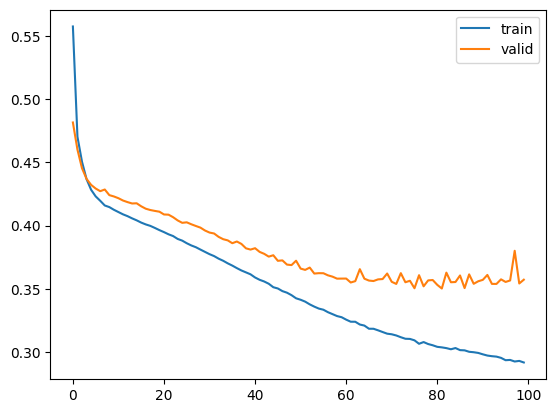

In [51]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Evaluate the model on X_val and y_val
results = model.evaluate(X_val, y_val)

50/50 [==============================] - 0s 1ms/step


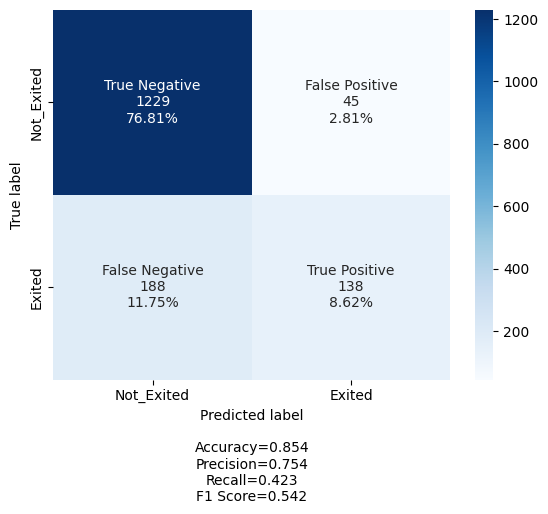

In [52]:
#Prediction on X_val and obtain the confusion matrix
y_pred1=model.predict(X_val)

#Let's predict using default threshold
y_pred1 = (y_pred1 > 0.5)
cm2=confusion_matrix(y_val, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

##### Observations
* This model has a loss of 0.35
* The recall is poor at 42% predicting 12% of the false negative
* As previously observed in th EDA, the dataset is imbalanced as there are more customers that belong in the 0 class. In the following models, we will use the ROC-AUC to find the optimal threshold to use for our prediction.

## Model 2

In [53]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [54]:
# Initializing the model
model2 = Sequential()
model2.add(Dense(264, activation='relu', kernel_initializer='he_uniform', input_dim=X_train.shape[1]))
model2.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model2.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model2.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
model2.add(Dense(1, activation='sigmoid'))

In [55]:
#compiling the model with Adam optimizer with a learning rate of 0.001 and binary cross entropy loss function
optimizer=tf.keras.optimizers.Adam(0.001)
model2.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [56]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 264)               3168      
                                                                 
 dense_1 (Dense)             (None, 128)               33920     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 47457 (185.38 KB)
Trainable params: 47457 (185.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
#fit the model on training data for 100 epochs
history=model2.fit(X_train, y_train,
                  validation_data=(X_val,y_val),
                  epochs=100)

Epoch 1/100
200/200 [==============================] - 3s 6ms/step - loss: 0.4267 - accuracy: 0.8206 - val_loss: 0.3950 - val_accuracy: 0.8363
Epoch 2/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3852 - accuracy: 0.8403 - val_loss: 0.3946 - val_accuracy: 0.8363
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3642 - accuracy: 0.8475 - val_loss: 0.3919 - val_accuracy: 0.8263
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3539 - accuracy: 0.8492 - val_loss: 0.3647 - val_accuracy: 0.8462
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3425 - accuracy: 0.8569 - val_loss: 0.3729 - val_accuracy: 0.8500
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3309 - accuracy: 0.8609 - val_loss: 0.3686 - val_accuracy: 0.8487
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3250 - accuracy: 0.8648 - val_loss: 0.3643 - val_accuracy: 0.8550

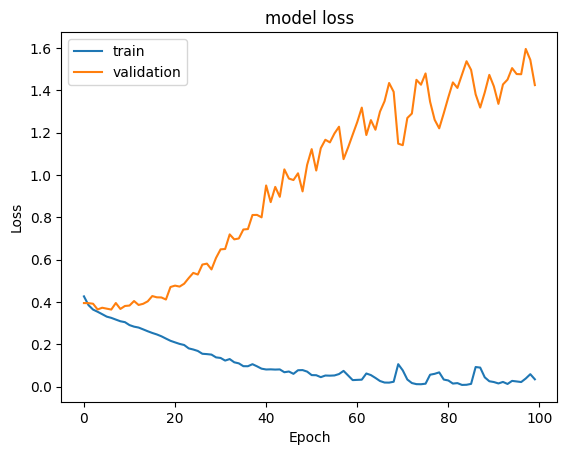

In [58]:
#Plotting Train Loss vs Validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

50/50 [==============================] - 0s 2ms/step


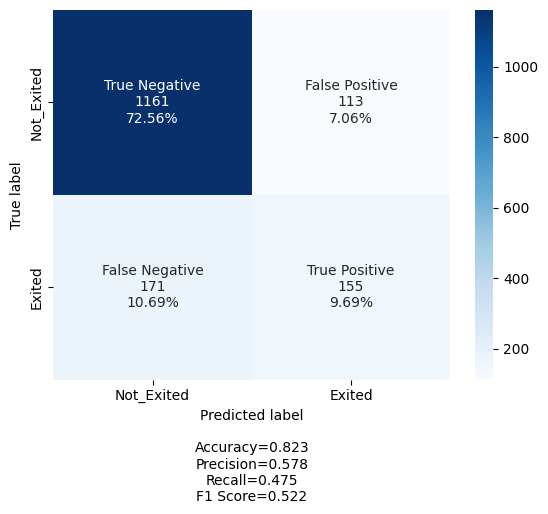

In [59]:
#Prediction on X_val and obtain the confusion matrix
y_pred2=model2.predict(X_val)

#Let's predict using default threshold
y_pred2 = (y_pred2 > 0.5)
cm2=confusion_matrix(y_val, y_pred2)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

##### Observations
* This model's recall improved at 48%, however it's also severly overfitting
* To fix the overfitting we will perform the regularization methods
* To improve the recall score, we will use the ROC-AUC to find the optimal threshold for our prediction

50/50 [==============================] - 0s 2ms/step
Best Threshold=0.018817, G-Mean=0.725


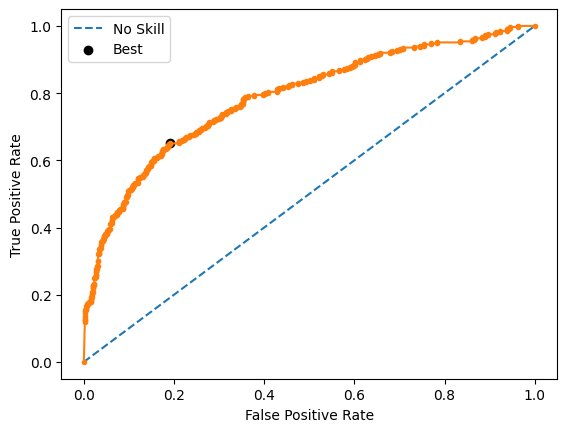

In [60]:
# predict probabilities
yhat1 = model2.predict(X_val)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_val, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [61]:
#Predicting the results using best as a threshold
y_pred_e1=model2.predict(X_val)
y_pred_e1 = (y_pred_e1 > thresholds1[ix])
y_pred_e1

50/50 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

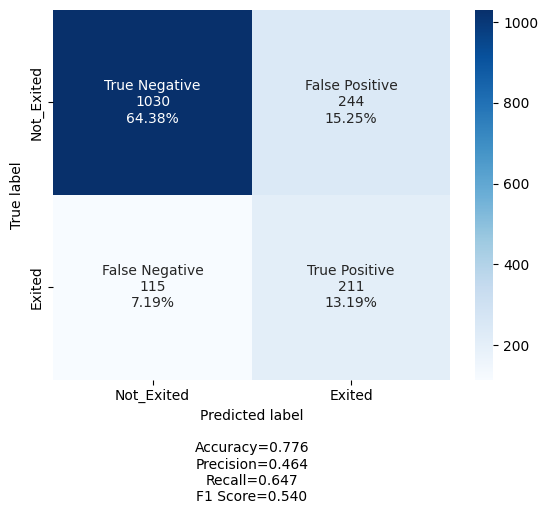

In [62]:
cm2=confusion_matrix(y_val, y_pred_e1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

##### Observations post tuning the ROC threshold
* As the number of layers in the neural network has increased, we can see that the recall has increased to 65%, and the False Negative percentage has decreased.

## Model 3

In [63]:
#defining model 3 to run early stopping
model3 = Sequential()
model3.add(Dense(128, activation='relu', kernel_initializer='he_uniform',input_dim=X_train.shape[1]))
model3.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model3.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
model3.add(Dense(1, activation='sigmoid', kernel_initializer='he_uniform'))
optimizer=tf.keras.optimizers.Adam(0.001)
model3.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [64]:
#Importing classback API
# Defining Early stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

## Complete the code to train the model on X_train and y_train for 100 epochs and also use X_val and y_val as validation_data
history_e = model3.fit(X_train,y_train,batch_size=32,epochs=100,verbose=1,validation_data=(X_val,y_val),callbacks=[es_cb])

Epoch 1/100
200/200 [==============================] - 2s 3ms/step - loss: 0.4281 - accuracy: 0.8181 - val_loss: 0.4109 - val_accuracy: 0.8275
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3954 - accuracy: 0.8386 - val_loss: 0.4004 - val_accuracy: 0.8363
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3767 - accuracy: 0.8430 - val_loss: 0.4081 - val_accuracy: 0.8200
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3652 - accuracy: 0.8456 - val_loss: 0.3781 - val_accuracy: 0.8400
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3524 - accuracy: 0.8520 - val_loss: 0.3767 - val_accuracy: 0.8494
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3422 - accuracy: 0.8552 - val_loss: 0.3713 - val_accuracy: 0.8487
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3353 - accuracy: 0.8612 - val_loss: 0.3681 - val_accuracy: 0.8494

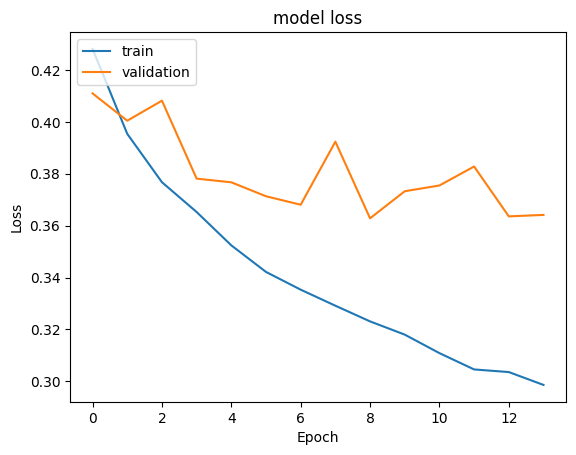

In [65]:
# Plotting Train Loss vs Validation Loss
plt.plot(history_e.history['loss'])
plt.plot(history_e.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

50/50 [==============================] - 0s 1ms/step
Best Threshold=0.139064, G-Mean=0.767


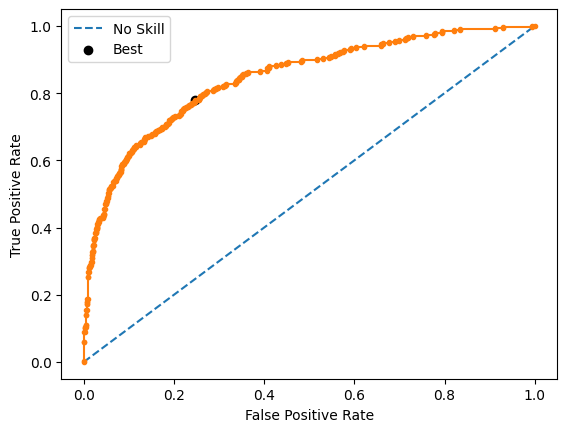

In [66]:
# predict probabilities
yhat2 = model3.predict(X_val)
# keep probabilities for the positive outcome only
yhat2 = yhat2[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_val, yhat2)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [67]:
#Predicting the results using best as a threshold
y_pred_e2=model3.predict(X_val)
y_pred_e2 = (y_pred_e2 > thresholds1[ix])
y_pred_e2

50/50 [==============================] - 0s 1ms/step


array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

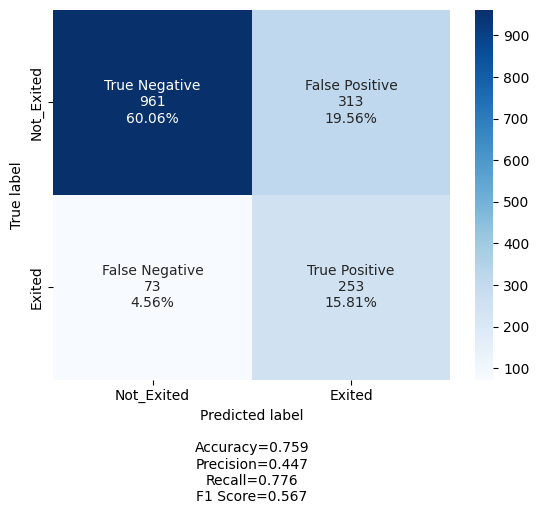

In [68]:
cm2=confusion_matrix(y_val, y_pred_e2)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

### Observations
* The model is still slightly overfit but has improved upon model 2
* The recall score also has increased to 78%

## Model 4

In [69]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [70]:
# Initializing the model
model4 = Sequential()
model4.add(Dense(128, activation='relu', kernel_initializer='he_uniform', input_dim=X_train.shape[1]))
#use BatchNormalization as a regulizer to address the overfitting issue
model4.add(BatchNormalization())
model4.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model4.add(BatchNormalization())
model4.add(Dense(1, activation='sigmoid'))
optimizer=tf.keras.optimizers.Adam(0.001)
model4.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [71]:
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10625 (41.50 KB)
Trainable params: 10241 (

In [72]:
#fit the model on training data for 100 epochs
history=model4.fit(X_train, y_train,
                  validation_data=(X_val,y_val),
                  epochs=100)

Epoch 1/100
200/200 [==============================] - 3s 4ms/step - loss: 0.5160 - accuracy: 0.7588 - val_loss: 0.4236 - val_accuracy: 0.8169
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3980 - accuracy: 0.8323 - val_loss: 0.3962 - val_accuracy: 0.8419
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3732 - accuracy: 0.8430 - val_loss: 0.3819 - val_accuracy: 0.8400
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3567 - accuracy: 0.8495 - val_loss: 0.3756 - val_accuracy: 0.8494
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3460 - accuracy: 0.8541 - val_loss: 0.3703 - val_accuracy: 0.8487
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3384 - accuracy: 0.8552 - val_loss: 0.3722 - val_accuracy: 0.8450
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3373 - accuracy: 0.8616 - val_loss: 0.3624 - val_accuracy: 0.8519

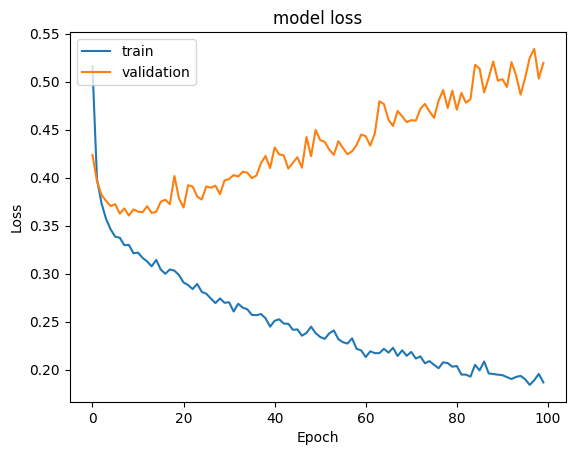

In [73]:
#Plotting Train Loss vs Validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

50/50 [==============================] - 0s 2ms/step
Best Threshold=0.113461, G-Mean=0.767


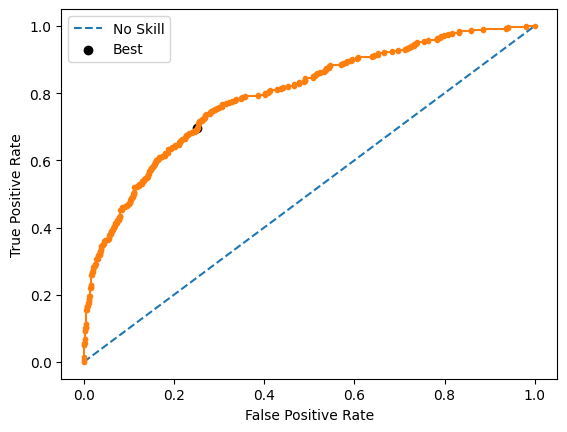

In [74]:
# predict probabilities
yhat3 = model4.predict(X_val)
# keep probabilities for the positive outcome only
yhat3 = yhat3[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_val, yhat3)
# calculate the g-mean for each threshold
gmeans2 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [75]:
#Predicting the results using best as a threshold
y_pred_e3=model4.predict(X_val)
y_pred_e3 = (y_pred_e3 > thresholds1[ix])
y_pred_e3

50/50 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

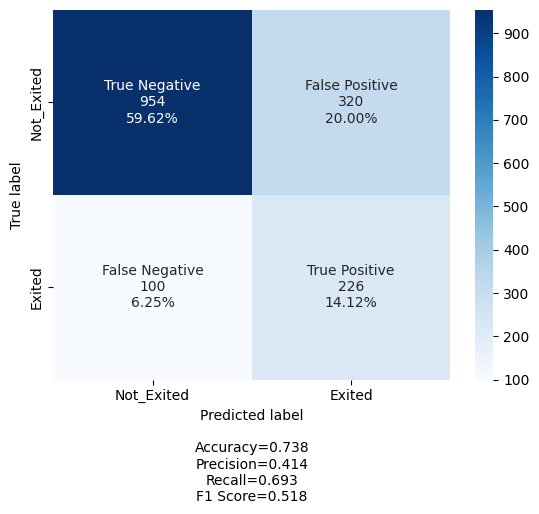

In [76]:
cm2=confusion_matrix(y_val, y_pred_e3)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

#### Observations
* The decrease in a hidden layer and addition of the BatchNormalization regularization method did not help with the overfitting issue with the modelThe
* The recall score decreased to 69% comparison to model 3

## Model 5

In [77]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [78]:
# Initializing the model
model5 = Sequential()
model5.add(Dense(64, activation='relu', kernel_initializer='he_uniform', input_dim=X_train.shape[1]))
#use Dropout as a regulizer to address the overfitting issue
model5.add(Dropout(0.2))
model5.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
model5.add(Dropout(0.1))
model5.add(Dense(16, activation='relu', kernel_initializer='he_uniform'))
model5.add(Dense(1, activation='sigmoid'))

optimizer=tf.keras.optimizers.Adam(0.001)
model5.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [79]:
model5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3393 (13.25 KB)
Trainable params: 3393 (13

In [80]:
#fit the model on training data for 100 epochs
history=model5.fit(X_train, y_train,
                  validation_data=(X_val,y_val),
                  epochs=100)

Epoch 1/100
200/200 [==============================] - 2s 4ms/step - loss: 0.4883 - accuracy: 0.7905 - val_loss: 0.4344 - val_accuracy: 0.8100
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4443 - accuracy: 0.8077 - val_loss: 0.4233 - val_accuracy: 0.8213
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4363 - accuracy: 0.8081 - val_loss: 0.4209 - val_accuracy: 0.8219
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4296 - accuracy: 0.8150 - val_loss: 0.4171 - val_accuracy: 0.8269
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4206 - accuracy: 0.8211 - val_loss: 0.4143 - val_accuracy: 0.8244
Epoch 6/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4169 - accuracy: 0.8213 - val_loss: 0.4103 - val_accuracy: 0.8281
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4140 - accuracy: 0.8241 - val_loss: 0.4071 - val_accuracy: 0.8306

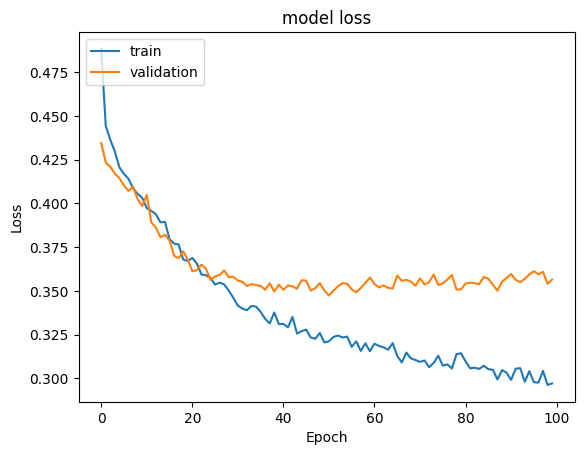

In [81]:
#Plotting Train Loss vs Validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

50/50 [==============================] - 0s 2ms/step
Best Threshold=0.156988, G-Mean=0.780


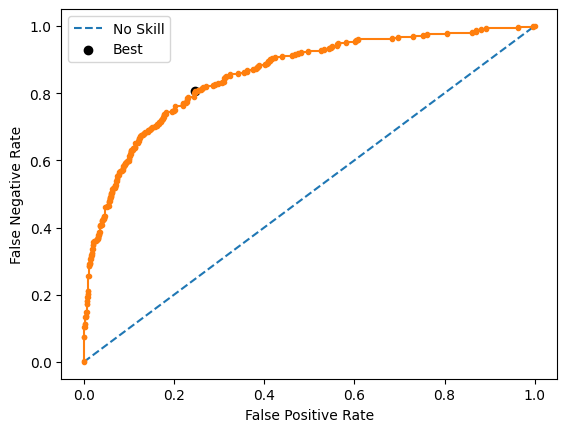

In [82]:
# predict probabilities
yhat4 = model5.predict(X_val)
# keep probabilities for the positive outcome only
yhat4 = yhat4[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_val, yhat4)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('False Negative Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [83]:
#Predicting the results using best as a threshold
y_pred_e4=model5.predict(X_val)
y_pred_e4 = (y_pred_e4 > thresholds1[ix])
y_pred_e4

50/50 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

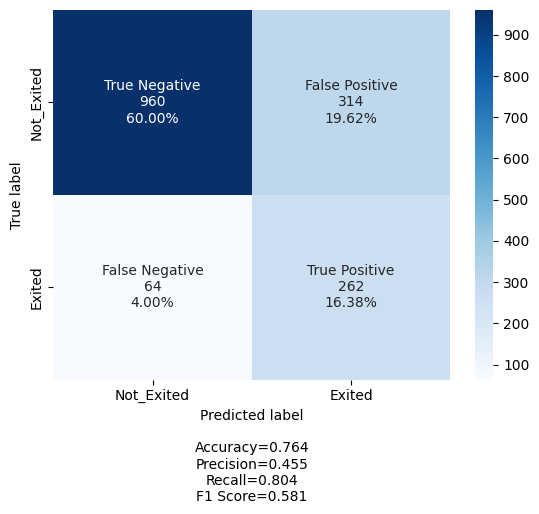

In [84]:
cm2=confusion_matrix(y_val, y_pred_e4)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

#### Observations
* By decreasing the number of neurons on the layers and implementing the dropout regulization the model has improved the fit between the training and validation set
* The recall score increased to 80.4%

## Model 6

In [85]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [86]:
# Initializing the model
model6 = Sequential()
model6.add(Dense(64, activation='relu', kernel_initializer='he_uniform', input_dim=X_train.shape[1]))
#use Dropout as a regulizer to address the overfitting issue
model6.add(Dropout(0.2))
model6.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
model6.add(Dropout(0.1))
model6.add(Dense(16, activation='relu', kernel_initializer='he_uniform'))
model6.add(Dense(1, activation='sigmoid'))

#Converting back to SGD optimizer as it it had a better fit than the Adam optimizer
model6.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [87]:
model6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3393 (13.25 KB)
Trainable params: 3393 (13

In [88]:
#fit the model on training data for 100 epochs
history=model6.fit(X_train, y_train,
                  validation_data=(X_val,y_val),
                  epochs=100)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.5230 - accuracy: 0.7706 - val_loss: 0.4606 - val_accuracy: 0.8019
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4807 - accuracy: 0.7937 - val_loss: 0.4459 - val_accuracy: 0.8044
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4723 - accuracy: 0.7942 - val_loss: 0.4417 - val_accuracy: 0.8044
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4658 - accuracy: 0.8008 - val_loss: 0.4367 - val_accuracy: 0.8031
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4610 - accuracy: 0.7952 - val_loss: 0.4332 - val_accuracy: 0.8069
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4543 - accuracy: 0.7991 - val_loss: 0.4329 - val_accuracy: 0.8075
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4523 - accuracy: 0.8025 - val_loss: 0.4316 - val_accuracy: 0.8075

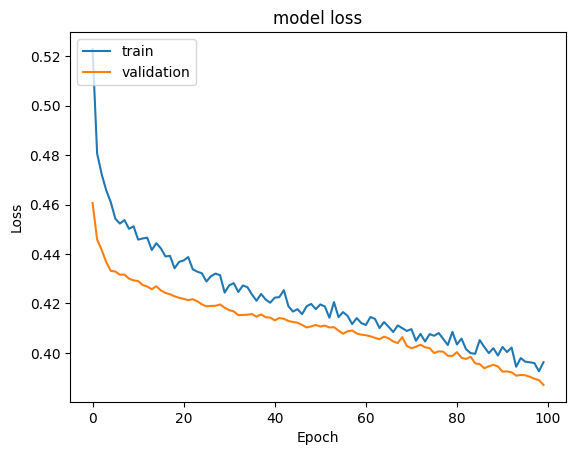

In [89]:
#Plotting Train Loss vs Validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

50/50 [==============================] - 0s 3ms/step
Best Threshold=0.212280, G-Mean=0.750


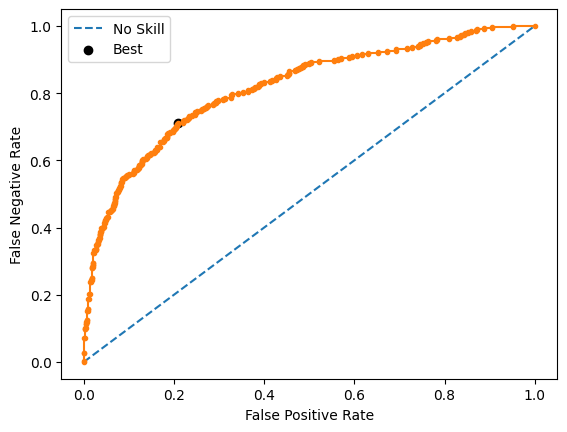

In [90]:
# predict probabilities
yhat5 = model6.predict(X_val)
# keep probabilities for the positive outcome only
yhat5 = yhat5[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_val, yhat5)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('False Negative Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [91]:
#Predicting the results using best as a threshold
y_pred_e5=model6.predict(X_val)
y_pred_e5 = (y_pred_e5 > thresholds1[ix])
y_pred_e5

50/50 [==============================] - 0s 3ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

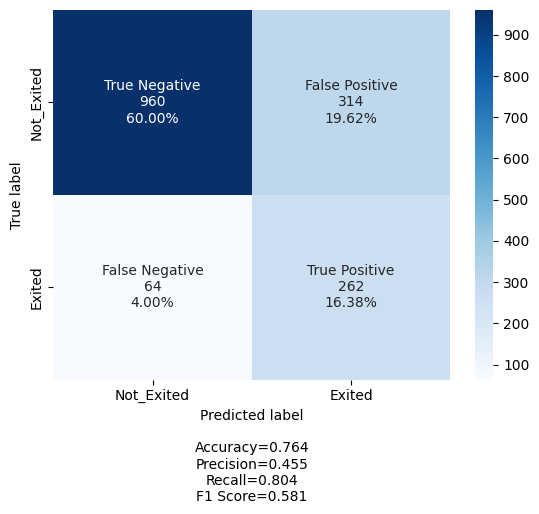

In [92]:
cm2=confusion_matrix(y_val, y_pred_e4)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

### Observations
* Although the recall score is the same as model 5 at 80.4%, the model is better fit by changing the optimizer to SGD.

## Final Model

* Model 6 is the best performing model which will be the model we use for the final model.
* Model 6 uses Dropout regularization technique

200/200 [==============================] - 1s 4ms/step
Best Threshold=0.205434, G-Mean=0.763


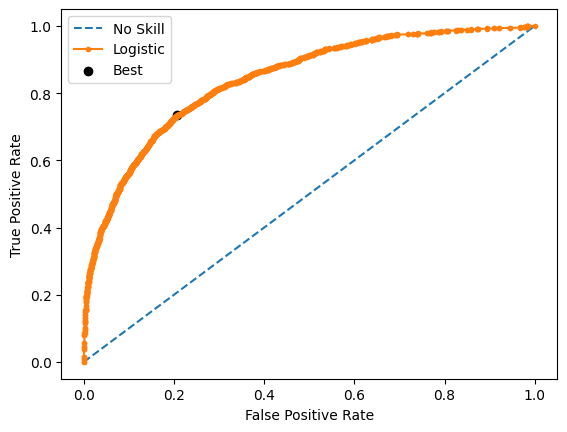

In [93]:
# predict probabilities using the best model
yhat = model6.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [94]:
#Predicting the results using best as a threshold
y_pred_test = model6.predict(X_test)
y_pred_test = (y_pred_test > thresholds[ix])
print(y_pred_test)

63/63 [==============================] - 0s 1ms/step
[[False]
 [False]
 [False]
 ...
 [ True]
 [False]
 [False]]


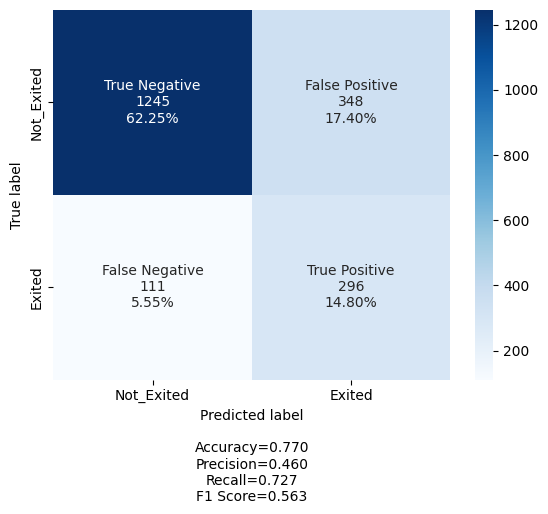

In [95]:
cm2=confusion_matrix(y_test, y_pred_test)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

#### Observations
* The model has been optimized to decrease the False Negative and increase the recall score
* The results of training resulted to minimizing the False negative at 5.55% and increasing the recall score to 72.7%

## Actionable Insights and Recommendations

**What recommedations would you suggest to the bank?**

* Based on the EDA, it's important for the bank to research as to why customers with a larger number of products tend to exit. There may be underlying issues within customer service or actual product satisfaction that results in the churn.
* Marketing/customer support efforts can be increased in Germany to help support customers that may be considering exiting.
* Get customer engaged with using bank services as active members are likelier to remain loyal customers


___

In [97]:
!jupyter nbconvert --to html Colleen_McCray_INN_Learner_Notebook_Full_code_version.ipynb

[NbConvertApp] Converting notebook Colleen_McCray_INN_Learner_Notebook_Full_code_version.ipynb to html
[NbConvertApp] Writing 2679837 bytes to Colleen_McCray_INN_Learner_Notebook_Full_code_version.html
